In [30]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from gym import spaces

In [28]:
class WarehouseRobotEnv(gym.Env):
    def __init__(self):
        super(WarehouseRobotEnv, self).__init__()
        self.grid_size = 6
        self.obstacles = [(2, 2), (2, 3), (3, 3), (4, 1)]
        self.pickup_location = (0, 0)
        self.dropoff_location = (5, 5)
        self.robot_position = list(self.pickup_location)
        self.carrying = False
        self.action_space = spaces.Discrete(5)
        self.observation_space = spaces.Tuple((
            spaces.Discrete(self.grid_size),
            spaces.Discrete(self.grid_size),
            spaces.Discrete(2)  # Carrying or not
        ))
        self.agent_img = mpimg.imread("idle_agent.jpg")
        self.agent_carrying_img = mpimg.imread("agent_carrying_package.jpg")
        self.obstacle_img = mpimg.imread("obstacle.jpg")
        self.dropoff_img = mpimg.imread("package.jpg")
        self.background_img = np.ones((self.grid_size, self.grid_size, 3))  # White background
    
    def reset(self):
        self.robot_position = list(self.pickup_location)
        self.carrying = False
        return self._get_obs()
    
    def step(self, action):
        reward = -1
        x, y = self.robot_position

        if action == 0 and y > 0:  # Move down
            self.robot_position[1] -= 1
        elif action == 1 and y < self.grid_size - 1:  # Move up
            self.robot_position[1] += 1
        elif action == 2 and x > 0:  # Move left
            self.robot_position[0] -= 1
        elif action == 3 and x < self.grid_size - 1:  # Move right
            self.robot_position[0] += 1
        elif action == 4:  # Drop package
            if tuple(self.robot_position) == self.dropoff_location and self.carrying:
                self.carrying = False
                reward += 100
        
        if tuple(self.robot_position) in self.obstacles:  # Hitting an obstacle
            reward -= 20
            self.robot_position = list(self.pickup_location)

        done = tuple(self.robot_position) == self.dropoff_location and not self.carrying
        return self._get_obs(), reward, done, {}

    def _get_obs(self):
        return (self.robot_position[0], self.robot_position[1], int(self.carrying))
    
    def render(self):
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.set_xticks(np.arange(self.grid_size + 1) - 0.5, minor=True)
        ax.set_yticks(np.arange(self.grid_size + 1) - 0.5, minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
        ax.set_xlim(-0.5, self.grid_size - 0.5)
        ax.set_ylim(-0.5, self.grid_size - 0.5)
        ax.invert_yaxis()  # Make (0,0) bottom-left
        
        ax.imshow(self.background_img, extent=[-0.5, self.grid_size - 0.5, -0.5, self.grid_size - 0.5])

        # Draw obstacles
        for obs in self.obstacles:
            ax.imshow(self.obstacle_img, extent=[obs[0] - 0.5, obs[0] + 0.5, obs[1] - 0.5, obs[1] + 0.5])

        # Draw dropoff location
        ax.imshow(self.dropoff_img, extent=[self.dropoff_location[0] - 0.5, self.dropoff_location[0] + 0.5, 
                                             self.dropoff_location[1] - 0.5, self.dropoff_location[1] + 0.5])

        # Draw agent
        agent_img = self.agent_carrying_img if self.carrying else self.agent_img
        ax.imshow(agent_img, extent=[self.robot_position[0] - 0.5, self.robot_position[0] + 0.5, 
                                      self.robot_position[1] - 0.5, self.robot_position[1] + 0.5])

        plt.show()


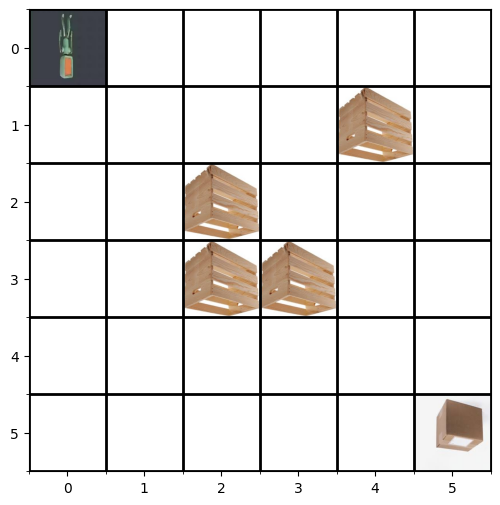

State: (0, 0, 0), Action: 4, Reward: -1


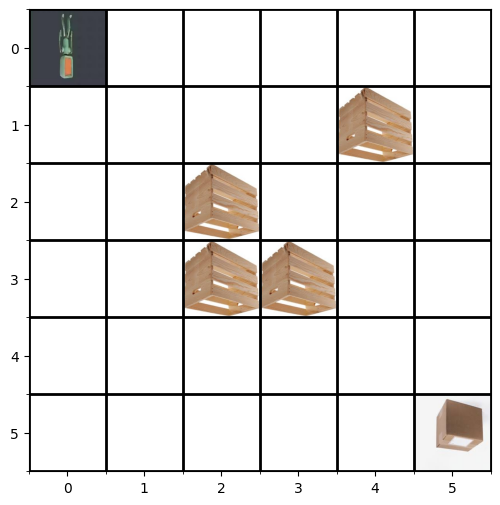

State: (0, 0, 0), Action: 2, Reward: -1


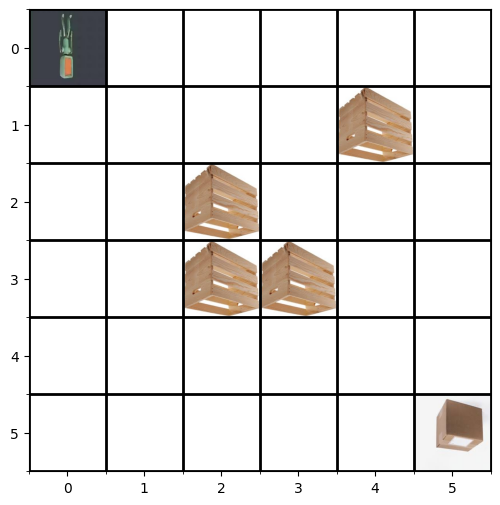

State: (0, 0, 0), Action: 2, Reward: -1


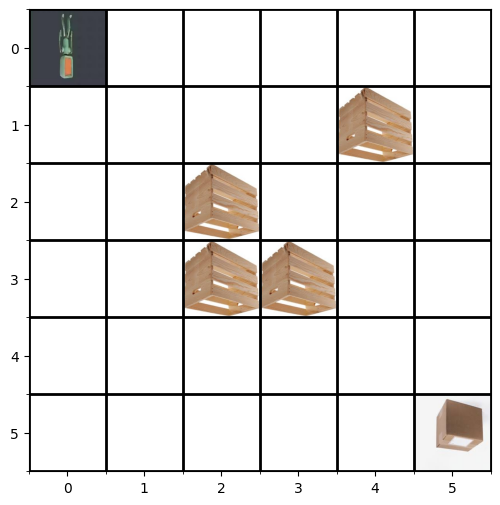

State: (0, 0, 0), Action: 0, Reward: -1


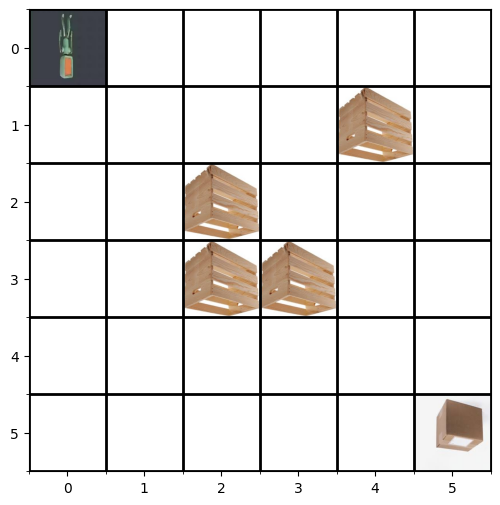

State: (0, 0, 0), Action: 4, Reward: -1


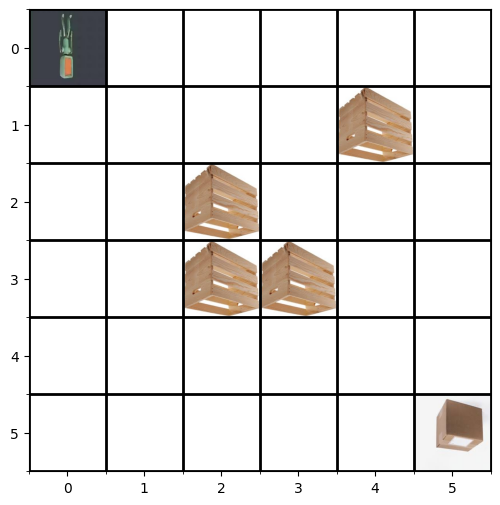

State: (0, 0, 0), Action: 0, Reward: -1


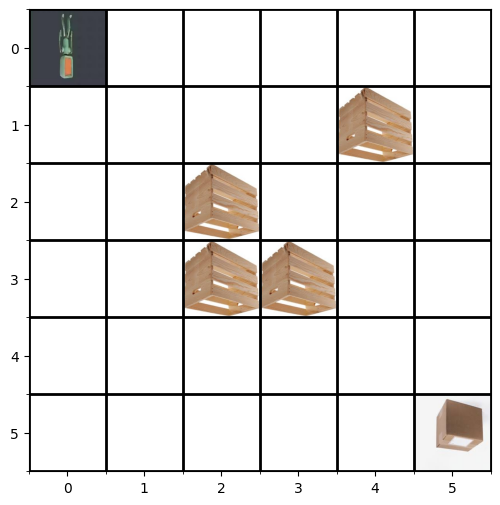

State: (0, 0, 0), Action: 0, Reward: -1


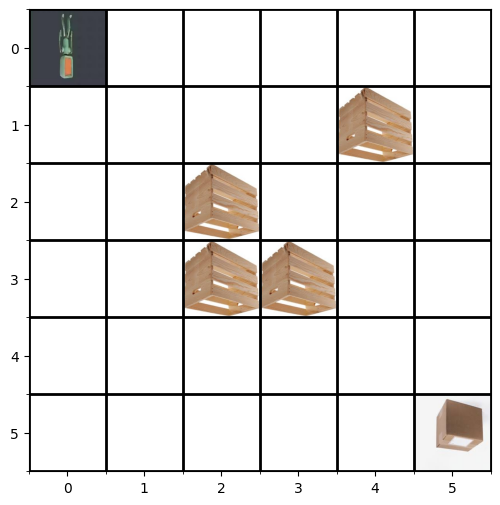

State: (0, 0, 0), Action: 0, Reward: -1


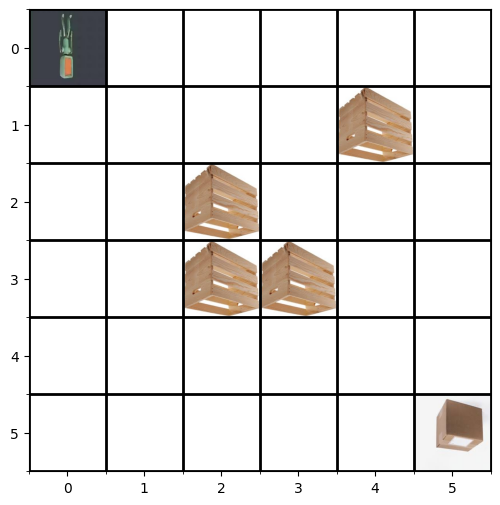

State: (0, 0, 0), Action: 0, Reward: -1


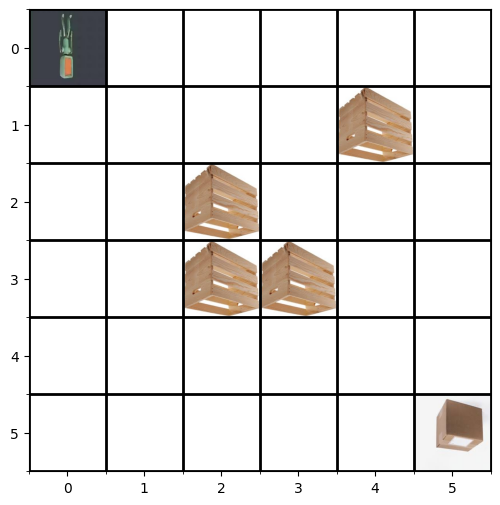

State: (0, 0, 0), Action: 4, Reward: -1


In [29]:
env = WarehouseRobotEnv()
env.reset()
for _ in range(10):
    action = env.action_space.sample()
    state, reward, done, _ = env.step(action)
    env.render()
    print(f"State: {state}, Action: {action}, Reward: {reward}")
    if done:
        break